<a href="https://colab.research.google.com/github/ehlatham/PUS2022_CWolk/blob/main/Water%20Land%20Trash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

These are the two DEP datasets we're using. I don't actually know yet how relevant they are or in what ways they're relevant. They were the only two layers on the DEP data explorer map (https://gis.dep.pa.gov/emappa/) that had locations in common with scrapyards. Other DEP geospatial layers for things like waste facilities, hazmat, etc. didn't seem to involve junkyards. Which doesn't mean that this is the only interaction between junkyards and DEP permitting/data, but maybe the most important or frequent one.

Re the DEP Map: I found (in a non-scientific way) the relevant datasets by just browsing their map with satellite imagery as the basemap and looked in areas with lots of scrapyards.

For example, here are all the PASDA (PA Spatial Data Access, hosted by Penn State but official data) results for PA DEP: https://www.pasda.psu.edu/uci/SearchResults.aspx?originator=Pennsylvania+Department+of+Environmental+Protection

Here is the Water Pollution Control Facilities link, with more info on the layer: https://www.pasda.psu.edu/uci/DataSummary.aspx?dataset=288

And the Land Recycling Cleanup Locations: https://www.pasda.psu.edu/uci/DataSummary.aspx?dataset=279

Some next steps:
1. Check CRS https://epsg.io/2272
2. do an overlay with the Philadelphia city boundary shapefile to clip only sites within Philadelphia using the City Limits shapefile (once CRS matches): https://www.opendataphilly.org/dataset/city-limits
Here's the shapefile (I assume we want that vs like CSV): https://opendata.arcgis.com/datasets/405ec3da942d4e20869d4e1449a2be48_0.zip
I think we want this clip tool? https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.clip.html
3. Figure out what these columns are/mean
4. Figure out which columns are important
5. Do more background research on what these datasets are about, since the DEP info is pretty jargon-y.


Map with the two data sets given and use City-limits to identify which are in the city limits.

A question to maybe ask Fed: once we clip this to Philly, should we assign these points to the Philly parcels from that other layer and then join them to Philly licenses/L&I stuff? Or just assign to parcels (assuming that works...)

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt install python3-rtree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [ ]:
!conda install -c conda-forge fiona

/bin/bash: conda: command not found


In [ ]:
import geopandas as gpd

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
deptrashland = gpd.GeoDataFrame.from_file("https://www.pasda.psu.edu/download/dep/LandRecyclingCleanupLocations2022_10.zip")

In [ ]:
deptrashland.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21570 entries, 0 to 21569
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ORGANIZATI  21570 non-null  object  
 1   CLIENT_NAM  21570 non-null  object  
 2   SITE_NAME   21570 non-null  object  
 3   PRIMARY_FA  21570 non-null  object  
 4   CLIENT_ID   21570 non-null  float64 
 5   SITE_ID     21570 non-null  float64 
 6   PRIMARY__1  21570 non-null  float64 
 7   SUB_FACILI  21570 non-null  object  
 8   SUB_FACI_1  21570 non-null  float64 
 9   PRIMARY__2  21570 non-null  object  
 10  PRIMARY__3  21570 non-null  object  
 11  OTHER_FACI  21570 non-null  object  
 12  SUB_FACI_2  21570 non-null  object  
 13  SOTHER_FID  21570 non-null  object  
 14  CLIENT_REL  21570 non-null  object  
 15  SITE_STATU  21570 non-null  object  
 16  PRIMARY__4  21570 non-null  object  
 17  SUB_FACI_3  21570 non-null  object  
 18  COMPLIANCE  21570 non-null  object  
 

In [ ]:
deptrashland.head()

,ORGANIZATI,CLIENT_NAM,SITE_NAME,PRIMARY_FA,CLIENT_ID,SITE_ID,PRIMARY__1,SUB_FACILI,SUB_FACI_1,PRIMARY__2,PRIMARY__3,OTHER_FACI,SUB_FACI_2,SOTHER_FID,CLIENT_REL,SITE_STATU,PRIMARY__4,SUB_FACI_3,COMPLIANCE,geometry
0,Unavailable,Unavailable,PENN TERM EDDYSTONE FAC,PENN TERMINALS,0.0,573594.0,617780.0,PENN TERMINALS-SOIL,733349.0,LAND RECYCLING CLEANUP LOCATION,Unavailable,1-23-821-819,SOIL MEDIA,733349,Owner,ACTIVE,ACTIVE,Unavailable,YES,POINT (-75.34166 39.84610)
1,Unavailable,Unavailable,PENN TERM EDDYSTONE FAC,PENN TERMINALS,0.0,573594.0,617780.0,PENN TERMINALS-SOIL,733350.0,LAND RECYCLING CLEANUP LOCATION,Unavailable,1-23-821-819,SOIL MEDIA,733350,Owner,ACTIVE,ACTIVE,Unavailable,YES,POINT (-75.34166 39.84610)
2,Unavailable,Unavailable,PENN TERM EDDYSTONE FAC,PENN TERMINALS,0.0,573594.0,617780.0,PENN TERMINALS-SOIL,733351.0,LAND RECYCLING CLEANUP LOCATION,Unavailable,1-23-821-819,SOIL MEDIA,733351,Owner,ACTIVE,ACTIVE,Unavailable,YES,POINT (-75.34166 39.84610)
3,Unavailable,Unavailable,PENN TERM EDDYSTONE FAC,PENN TERMINALS,0.0,573594.0,617780.0,PENN TERMINALS-SOIL,733352.0,LAND RECYCLING CLEANUP LOCATION,Unavailable,1-23-821-819,SOIL MEDIA,733352,Owner,ACTIVE,ACTIVE,Unavailable,YES,POINT (-75.34166 39.84610)
4,Unavailable,Unavailable,PENN VALVE & FITTING,PENN VALVE & FITTING,0.0,584244.0,618404.0,PENN VALVE & FITTING CO-SOIL,734473.0,LAND RECYCLING CLEANUP LOCATION,Unavailable,1-46-9-4537,SOIL MEDIA,734473,Owner,INACTIVE,ACTIVE,Unavailable,YES,POINT (-75.13222 40.16055)


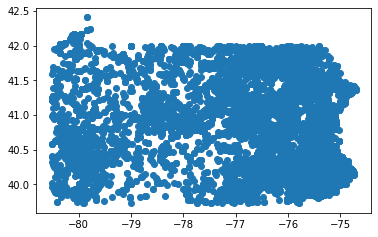

In [ ]:
deptrashland.plot()

In [ ]:
deptrashland.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [ ]:
#This is the DEP Water Permits Layer
depwater = gpd.GeoDataFrame.from_file("https://www.pasda.psu.edu/download/dep/WaterPollutionControlFacilities2022_07.zip")

In [ ]:
depwater.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33642 entries, 0 to 33641
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ORGANIZATI  33642 non-null  object  
 1   CLIENT_NAM  33642 non-null  object  
 2   SITE_NAME   33642 non-null  object  
 3   PRIMARY_FA  33642 non-null  object  
 4   CLIENT_ID   33642 non-null  float64 
 5   SITE_ID     33642 non-null  float64 
 6   PRIMARY__1  33642 non-null  float64 
 7   SUB_FACILI  33642 non-null  object  
 8   SUB_FACI_1  33642 non-null  float64 
 9   PRIMARY__2  33642 non-null  object  
 10  PRIMARY__3  33642 non-null  object  
 11  OTHER_FACI  33642 non-null  object  
 12  SUB_FACI_2  33642 non-null  object  
 13  SOTHER_FID  33642 non-null  object  
 14  CLIENT_REL  33642 non-null  object  
 15  SITE_STATU  33642 non-null  object  
 16  PRIMARY__4  33642 non-null  object  
 17  SUB_FACI_3  33642 non-null  object  
 18  COMPLIANCE  33642 non-null  object  
 

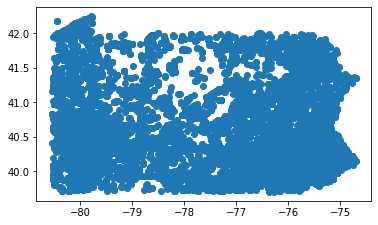

In [ ]:
depwater.plot()

In [ ]:
depwater.head()

,ORGANIZATI,CLIENT_NAM,SITE_NAME,PRIMARY_FA,CLIENT_ID,SITE_ID,PRIMARY__1,SUB_FACILI,SUB_FACI_1,PRIMARY__2,PRIMARY__3,OTHER_FACI,SUB_FACI_2,SOTHER_FID,CLIENT_REL,SITE_STATU,PRIMARY__4,SUB_FACI_3,COMPLIANCE,geometry
0,HEARTHSTONE COMMUNITY ASSOC,HEARTHSTONE COMMUNITY ASSOC,JULIE POND 5 PESTICIDES,JULIE POND 5 PESTICIDES,301697.0,769225.0,760649.0,JULIE POND 5 PESTICIDES,1097216.0,WATER POLLUTION CONTROL FACILITY,PESTICIDES,0913821,PESTICIDE TREATMENT AREA,001,Owner,ACTIVE,ACTIVE,ACTIVE,YES,POINT (-75.09347 40.35116)
1,Unavailable,BRUBAKER NICHOLAS,BRUBAKER RUN FARM,BRUBAKER RUN FARM,332757.0,710650.0,711567.0,GREINER AND WEAVER DUCK OPERATION,996628.0,WATER POLLUTION CONTROL FACILITY,CONCENTRATED ANIMAL FEED OPERATION,PAG123666,PRODUCTION SERVICE UNIT,PAG123666,Owner,ACTIVE,ACTIVE,ACTIVE,YES,POINT (-76.49507 40.19909)
2,DELAWARE CNTY,DELAWARE CNTY,DELAWARE CNTY MS4 UA,DELAWARE CNTY MS4,70553.0,645825.0,661872.0,OUTFALL 007 TO UNT TO CRUM CREEK (ROSE TREE PARK),1114222.0,WATER POLLUTION CONTROL FACILITY,STORMWATER-MUNICIPAL,PAI130545,DISCHARGE POINT,007,Owner,ACTIVE,ACTIVE,ACTIVE,YES,POINT (-75.39125 39.93883)
3,PGH WATER SEW AUTH,PGH WATER SEW AUTH,PITTSBURGH WATER & SEW AUTH,PGH WTP,74346.0,271340.0,294231.0,OUTFALL 023,559177.0,WATER POLLUTION CONTROL FACILITY,INDUSTRIAL WASTE,PA0218961,DISCHARGE POINT,023,Owner,ACTIVE,ACTIVE,ACTIVE,YES,POINT (-79.89722 40.48694)
4,RIVER MATERIALS INC,RIVER MATERIALS INC,MCKEESPORT HANDLING FAC,MCKEESPORT HANDLING FAC,350939.0,837358.0,835707.0,OUTFALL 001,1289862.0,WATER POLLUTION CONTROL FACILITY,STORMWATER-INDUSTRIAL,PA0255572,DISCHARGE POINT,001,Owner,ACTIVE,ACTIVE,ACTIVE,YES,POINT (-79.84441 40.35566)


In [ ]:
depwater.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [ ]:
PhilLimits = gpd.GeoDataFrame.from_file("https://opendata.arcgis.com/datasets/405ec3da942d4e20869d4e1449a2be48_0.geojson")

In [ ]:
PhilLimits.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       1 non-null      int64   
 1   Shape__Area    1 non-null      float64 
 2   Shape__Length  1 non-null      float64 
 3   geometry       1 non-null      geometry
dtypes: float64(2), geometry(1), int64(1)
memory usage: 160.0 bytes


In [ ]:
PhilLimits.head()

,OBJECTID,Shape__Area,Shape__Length,geometry
0,1,3.970706e+09,394751.12047,"POLYGON ((-75.01497 40.13793, -75.01456 40.137..."


In [ ]:
PhilLimits.describe()

,OBJECTID,Shape__Area,Shape__Length
count,1.0,1.000000e+00,1.00000
mean,1.0,3.970706e+09,394751.12047
std,NaN,NaN,NaN
min,1.0,3.970706e+09,394751.12047
25%,1.0,3.970706e+09,394751.12047
50%,1.0,3.970706e+09,394751.12047
75%,1.0,3.970706e+09,394751.12047
max,1.0,3.970706e+09,394751.12047


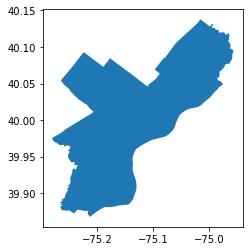

In [ ]:
PhilLimits.plot()

In [ ]:
PhilLimits.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
#f, ax = plt.subplots(figsize=(10,10))
#plt.title("Land Recycling Clean-Up Locations in Philadelphia")
#ct_shape.boundary.plot(ax=ax, zorder = 1, alpha=0)
#PhilLimits.plot(ax=ax, color="None", edgecolor="k", alpha = 0.5)
#deptrashlandzip.plot(ax=ax, column="geometry", c="Paired", alpha=0.8)

In [ ]:
#f, ax = plt.subplots(figsize=(10,10))
#ax.set_xlabel("feet easting")
#ax.set_ylabel("feet northing")
#ct_shape.boundary.plot(ax=ax, alpha=0.5)
#ct_shape.plot(ax=ax, color="None", edgecolor='k')
#plt.title("Citibike station locations over NYC census tracts")
#cbstationsNY.plot(ax=ax, c="Orange");

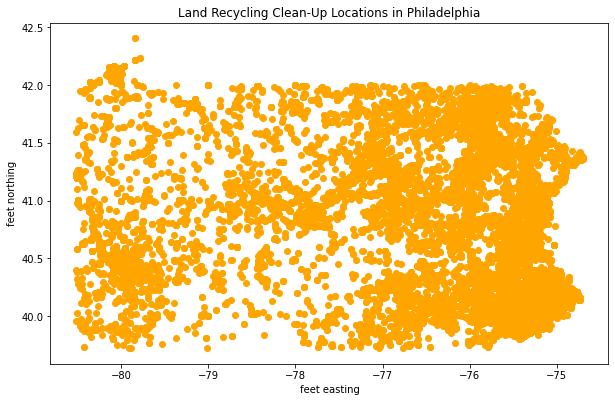

In [ ]:
#was able to make the plotting work, though no way to identify which are in Philly
f, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("feet easting")
ax.set_ylabel("feet northing")
#ct_shape.boundary.plot(ax=ax, alpha=0.5)
PhilLimits.plot(ax=ax, color="black", edgecolor='k')
plt.title("Land Recycling Clean-Up Locations in Philadelphia")
deptrashland.plot(ax=ax, c="Orange");

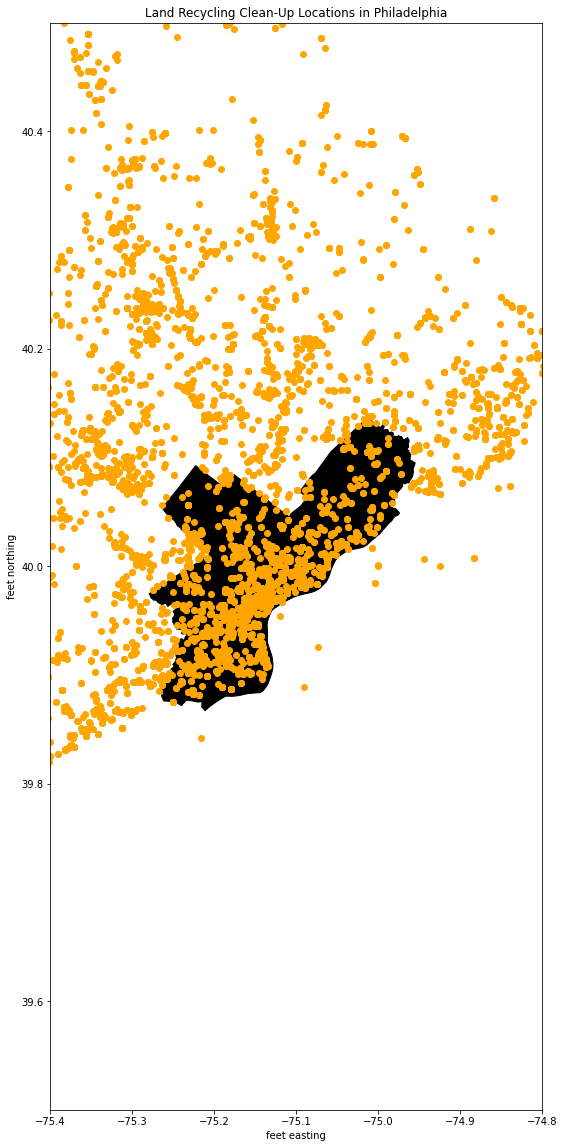

In [ ]:
#So we can see what dots are in philly, now we have to identify what that dots are
f, ax = plt.subplots(figsize=(20,20))
ax.set_xlabel("feet easting")
ax.set_ylabel("feet northing")
ax.set_xlim(left=-75.4, right=-74.8)
ax.set_ylim(bottom=39.5, top=40.5)
#ct_shape.boundary.plot(ax=ax, alpha=0.5)
PhilLimits.plot(ax=ax, color="black", edgecolor='k')
plt.title("Land Recycling Clean-Up Locations in Philadelphia")
deptrashland.plot(ax=ax, c="Orange");

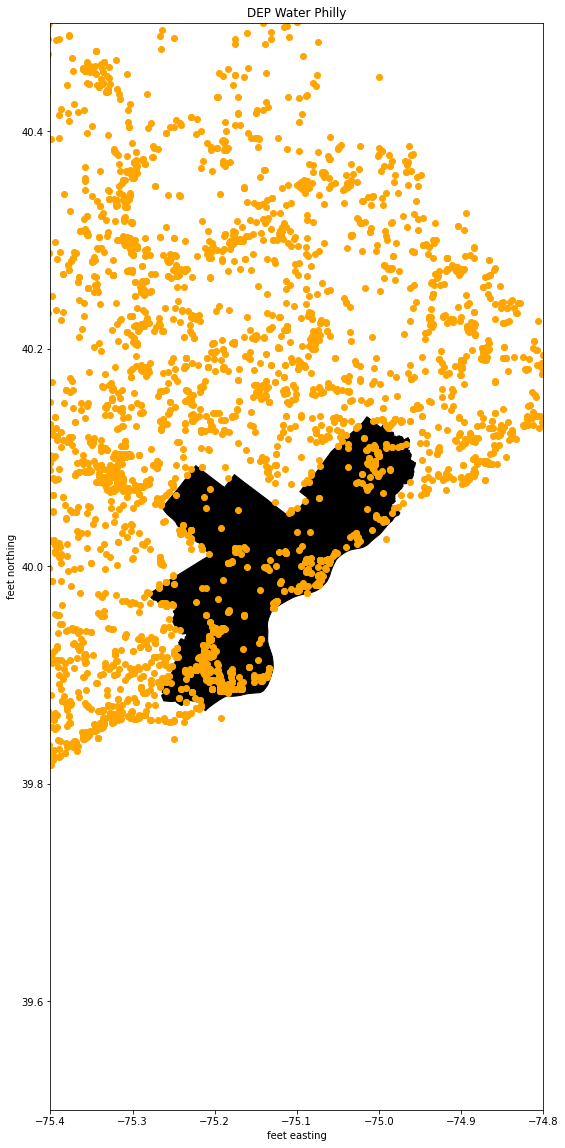

In [ ]:
#So we can see what dots are in philly, now we have to identify what that dots are
f, ax = plt.subplots(figsize=(20,20))
ax.set_xlabel("feet easting")
ax.set_ylabel("feet northing")
ax.set_xlim(left=-75.4, right=-74.8)
ax.set_ylim(bottom=39.5, top=40.5)
#ct_shape.boundary.plot(ax=ax, alpha=0.5)
PhilLimits.plot(ax=ax, color="black", edgecolor='k')
plt.title("DEP Water Philly")
depwater.plot(ax=ax, c="Orange");

Now we clip them to find which ones are which
Dataframe.clip (Trim vlaues at input threashold in dataframe)

In [ ]:
PhilLimits_proj = PhilLimits.to_crs(2272)

In [ ]:
deptrashland_proj = deptrashland.to_crs(2272)

In [ ]:
depwater_proj = depwater.to_crs(2272)

In [ ]:
Phdepwater = depwater_proj.clip(PhilLimits_proj)

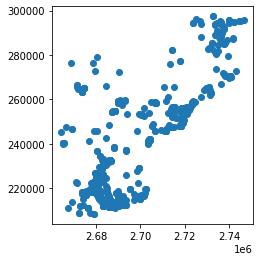

In [ ]:
Phdepwater.plot()

In [ ]:
Phdepwater.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 587 entries, 23767 to 19078
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ORGANIZATI  587 non-null    object  
 1   CLIENT_NAM  587 non-null    object  
 2   SITE_NAME   587 non-null    object  
 3   PRIMARY_FA  587 non-null    object  
 4   CLIENT_ID   587 non-null    float64 
 5   SITE_ID     587 non-null    float64 
 6   PRIMARY__1  587 non-null    float64 
 7   SUB_FACILI  587 non-null    object  
 8   SUB_FACI_1  587 non-null    float64 
 9   PRIMARY__2  587 non-null    object  
 10  PRIMARY__3  587 non-null    object  
 11  OTHER_FACI  587 non-null    object  
 12  SUB_FACI_2  587 non-null    object  
 13  SOTHER_FID  587 non-null    object  
 14  CLIENT_REL  587 non-null    object  
 15  SITE_STATU  587 non-null    object  
 16  PRIMARY__4  587 non-null    object  
 17  SUB_FACI_3  587 non-null    object  
 18  COMPLIANCE  587 non-null    object  

In [ ]:
Phdepwater.head()

,ORGANIZATI,CLIENT_NAM,SITE_NAME,PRIMARY_FA,CLIENT_ID,SITE_ID,PRIMARY__1,SUB_FACILI,SUB_FACI_1,PRIMARY__2,PRIMARY__3,OTHER_FACI,SUB_FACI_2,SOTHER_FID,CLIENT_REL,SITE_STATU,PRIMARY__4,SUB_FACI_3,COMPLIANCE,geometry
23767,SANDMEYER STEEL CO,SANDMEYER STEEL CO,SANDMEYER STEEL,SANDMEYER STEEL PHILADELPHIA FACILITY,178229.0,510837.0,718613.0,OUTFALL 001,989967.0,WATER POLLUTION CONTROL FACILITY,STORMWATER-INDUSTRIAL,NNOEXSE108,PRODUCTION SERVICE UNIT,001,Owner,ACTIVE,ACTIVE,ACTIVE,YES,POINT (2732592.197 297479.967)
11581,BOTTLING GROUP LLC,BOTTLING GROUP LLC,PEPSI BOTTLING ROOSEVELT BLVD PLT,PEPSI COLA BOTTLING ROOSEVELT BLVD PLT,252597.0,445688.0,569300.0,OUTFALL 001,564735.0,WATER POLLUTION CONTROL FACILITY,STORMWATER-INDUSTRIAL,PAR120003,DISCHARGE POINT,001,Owner,ACTIVE,ACTIVE,ACTIVE,NO,POINT (2737861.225 291691.754)
11582,BOTTLING GROUP LLC,BOTTLING GROUP LLC,PEPSI BOTTLING ROOSEVELT BLVD PLT,PEPSI COLA BOTTLING ROOSEVELT BLVD PLT,252597.0,445688.0,569300.0,OUTFALL 002,932942.0,WATER POLLUTION CONTROL FACILITY,STORMWATER-INDUSTRIAL,PAR120003,DISCHARGE POINT,002,Owner,ACTIVE,ACTIVE,ACTIVE,YES,POINT (2737844.126 291716.530)
11583,BOTTLING GROUP LLC,BOTTLING GROUP LLC,PEPSI BOTTLING ROOSEVELT BLVD PLT,PEPSI COLA BOTTLING ROOSEVELT BLVD PLT,252597.0,445688.0,569300.0,OUTFALL 003,932943.0,WATER POLLUTION CONTROL FACILITY,STORMWATER-INDUSTRIAL,PAR120003,DISCHARGE POINT,003,Owner,ACTIVE,ACTIVE,ACTIVE,YES,POINT (2737640.722 292081.743)
30104,BOTTLING GROUP LLC,BOTTLING GROUP LLC,PEPSI BOTTLING ROOSEVELT BLVD PLT,PEPSI COLA BOTTLING ROOSEVELT BLVD PLT,252597.0,445688.0,569300.0,OUTFALL 004,932944.0,WATER POLLUTION CONTROL FACILITY,STORMWATER-INDUSTRIAL,PAR120003,DISCHARGE POINT,004,Owner,ACTIVE,ACTIVE,ACTIVE,YES,POINT (2737557.175 292168.233)


In [ ]:
Phdepwater

,ORGANIZATI,CLIENT_NAM,SITE_NAME,PRIMARY_FA,CLIENT_ID,SITE_ID,PRIMARY__1,SUB_FACILI,SUB_FACI_1,PRIMARY__2,PRIMARY__3,OTHER_FACI,SUB_FACI_2,SOTHER_FID,CLIENT_REL,SITE_STATU,PRIMARY__4,SUB_FACI_3,COMPLIANCE,geometry
23767,SANDMEYER STEEL CO,SANDMEYER STEEL CO,SANDMEYER STEEL,SANDMEYER STEEL PHILADELPHIA FACILITY,178229.0,510837.0,718613.0,OUTFALL 001,989967.0,WATER POLLUTION CONTROL FACILITY,STORMWATER-INDUSTRIAL,NNOEXSE108,PRODUCTION SERVICE UNIT,001,Owner,ACTIVE,ACTIVE,ACTIVE,YES,POINT (2732592.197 297479.967)
11581,BOTTLING GROUP LLC,BOTTLING GROUP LLC,PEPSI BOTTLING ROOSEVELT BLVD PLT,PEPSI COLA BOTTLING ROOSEVELT BLVD PLT,252597.0,445688.0,569300.0,OUTFALL 001,564735.0,WATER POLLUTION CONTROL FACILITY,STORMWATER-INDUSTRIAL,PAR120003,DISCHARGE POINT,001,Owner,ACTIVE,ACTIVE,ACTIVE,NO,POINT (2737861.225 291691.754)
11582,BOTTLING GROUP LLC,BOTTLING GROUP LLC,PEPSI BOTTLING ROOSEVELT BLVD PLT,PEPSI COLA BOTTLING ROOSEVELT BLVD PLT,252597.0,445688.0,569300.0,OUTFALL 002,932942.0,WATER POLLUTION CONTROL FACILITY,STORMWATER-INDUSTRIAL,PAR120003,DISCHARGE POINT,002,Owner,ACTIVE,ACTIVE,ACTIVE,YES,POINT (2737844.126 291716.530)
11583,BOTTLING GROUP LLC,BOTTLING GROUP LLC,PEPSI BOTTLING ROOSEVELT BLVD PLT,PEPSI COLA BOTTLING ROOSEVELT BLVD PLT,252597.0,445688.0,569300.0,OUTFALL 003,932943.0,WATER POLLUTION CONTROL FACILITY,STORMWATER-INDUSTRIAL,PAR120003,DISCHARGE POINT,003,Owner,ACTIVE,ACTIVE,ACTIVE,YES,POINT (2737640.722 292081.743)
30104,BOTTLING GROUP LLC,BOTTLING GROUP LLC,PEPSI BOTTLING ROOSEVELT BLVD PLT,PEPSI COLA BOTTLING ROOSEVELT BLVD PLT,252597.0,445688.0,569300.0,OUTFALL 004,932944.0,WATER POLLUTION CONTROL FACILITY,STORMWATER-INDUSTRIAL,PAR120003,DISCHARGE POINT,004,Owner,ACTIVE,ACTIVE,ACTIVE,YES,POINT (2737557.175 292168.233)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368,PENN SHIP SVC LLC,PENN SHIP SVC LLC,FORMER PHILADELPHIA NAVY YARD DRY DOCK 3,FORMER PHILA NAVY YARD DRY DOCK 3,264233.0,708758.0,707131.0,OUTFALL 003,1112877.0,WATER POLLUTION CONTROL FACILITY,INDUSTRIAL WASTE,PA0244431,DISCHARGE POINT,003,Owner,ACTIVE,ACTIVE,ACTIVE,YES,POINT (2688452.838 211998.680)
27065,PHILLY SHIPYARDS INC,PHILLY SHIPYARDS INC,PHILLY SHIPYARD INC,AKER PHILADELPHIA SHIPYARD FACILITY,249004.0,498403.0,557105.0,OUTFALL 039,520918.0,WATER POLLUTION CONTROL FACILITY,INDUSTRIAL WASTE,PA0057690,DISCHARGE POINT,039,Owner,ACTIVE,ACTIVE,ACTIVE,YES,POINT (2685830.157 211998.732)
26636,PENN SHIP SVC LLC,PENN SHIP SVC LLC,FORMER PHILADELPHIA NAVY YARD DRY DOCK 3,FORMER PHILA NAVY YARD DRY DOCK 3,264233.0,708758.0,707131.0,OUTFALL 002,1112873.0,WATER POLLUTION CONTROL FACILITY,INDUSTRIAL WASTE,PA0244431,DISCHARGE POINT,002,Owner,ACTIVE,ACTIVE,ACTIVE,YES,POINT (2688659.515 212024.934)
12493,PENN SHIP SVC LLC,PENN SHIP SVC LLC,FORMER PHILADELPHIA NAVY YARD DRY DOCK 3,FORMER PHILA NAVY YARD DRY DOCK 3,264233.0,708758.0,707131.0,OUTFALL 011,970165.0,WATER POLLUTION CONTROL FACILITY,INDUSTRIAL WASTE,PA0244431,DISCHARGE POINT,011,Owner,ACTIVE,ACTIVE,ACTIVE,YES,POINT (2688677.144 212035.567)


In [ ]:
Phdepwater1 = Phdepwater[["geometry","PRIMARY__2",	"PRIMARY__3"]]

water usage row, location 

In [ ]:
Phdepwater1.head()

,geometry,PRIMARY__2,PRIMARY__3
23767,POINT (2732592.197 297479.967),WATER POLLUTION CONTROL FACILITY,STORMWATER-INDUSTRIAL
11581,POINT (2737861.225 291691.754),WATER POLLUTION CONTROL FACILITY,STORMWATER-INDUSTRIAL
11582,POINT (2737844.126 291716.530),WATER POLLUTION CONTROL FACILITY,STORMWATER-INDUSTRIAL
11583,POINT (2737640.722 292081.743),WATER POLLUTION CONTROL FACILITY,STORMWATER-INDUSTRIAL
30104,POINT (2737557.175 292168.233),WATER POLLUTION CONTROL FACILITY,STORMWATER-INDUSTRIAL


In [ ]:
Phdepwater1

,geometry,PRIMARY__2,PRIMARY__3
23767,POINT (2732592.197 297479.967),WATER POLLUTION CONTROL FACILITY,STORMWATER-INDUSTRIAL
11581,POINT (2737861.225 291691.754),WATER POLLUTION CONTROL FACILITY,STORMWATER-INDUSTRIAL
11582,POINT (2737844.126 291716.530),WATER POLLUTION CONTROL FACILITY,STORMWATER-INDUSTRIAL
11583,POINT (2737640.722 292081.743),WATER POLLUTION CONTROL FACILITY,STORMWATER-INDUSTRIAL
30104,POINT (2737557.175 292168.233),WATER POLLUTION CONTROL FACILITY,STORMWATER-INDUSTRIAL
...,...,...,...
2368,POINT (2688452.838 211998.680),WATER POLLUTION CONTROL FACILITY,INDUSTRIAL WASTE
27065,POINT (2685830.157 211998.732),WATER POLLUTION CONTROL FACILITY,INDUSTRIAL WASTE
26636,POINT (2688659.515 212024.934),WATER POLLUTION CONTROL FACILITY,INDUSTRIAL WASTE
12493,POINT (2688677.144 212035.567),WATER POLLUTION CONTROL FACILITY,INDUSTRIAL WASTE


This is the right amount of rows. 

In [ ]:
Phdeptrashland = deptrashland_proj.clip(PhilLimits_proj)

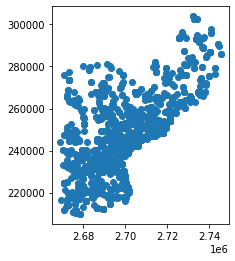

In [ ]:
Phdeptrashland.plot()

In [ ]:
Phdeptrashland.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1691 entries, 19904 to 6142
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ORGANIZATI  1691 non-null   object  
 1   CLIENT_NAM  1691 non-null   object  
 2   SITE_NAME   1691 non-null   object  
 3   PRIMARY_FA  1691 non-null   object  
 4   CLIENT_ID   1691 non-null   float64 
 5   SITE_ID     1691 non-null   float64 
 6   PRIMARY__1  1691 non-null   float64 
 7   SUB_FACILI  1691 non-null   object  
 8   SUB_FACI_1  1691 non-null   float64 
 9   PRIMARY__2  1691 non-null   object  
 10  PRIMARY__3  1691 non-null   object  
 11  OTHER_FACI  1691 non-null   object  
 12  SUB_FACI_2  1691 non-null   object  
 13  SOTHER_FID  1691 non-null   object  
 14  CLIENT_REL  1691 non-null   object  
 15  SITE_STATU  1691 non-null   object  
 16  PRIMARY__4  1691 non-null   object  
 17  SUB_FACI_3  1691 non-null   object  
 18  COMPLIANCE  1691 non-null   object  

SUB_FACI_2 is the category of material 
 Air, Contained Release or Abandoned Container, Groundwater, Sediment, Soil, Surface Water, and Waste.
 We want waste
 primary facility is the acts from which cleanup is derived 
  Air, Contained Release or Abandoned Container, Groundwater, Sediment, Soil, Surface Water, and Waste.

  https://www.pasda.psu.edu/uci/DataSummary.aspx?dataset=279

In [ ]:
Phdeptrashland

,ORGANIZATI,CLIENT_NAM,SITE_NAME,PRIMARY_FA,CLIENT_ID,SITE_ID,PRIMARY__1,SUB_FACILI,SUB_FACI_1,PRIMARY__2,PRIMARY__3,OTHER_FACI,SUB_FACI_2,SOTHER_FID,CLIENT_REL,SITE_STATU,PRIMARY__4,SUB_FACI_3,COMPLIANCE,geometry
19904,MISI LP,MISI LP,13625-13649 PHILMONT AVE,13625-13649 PHILMONT AVE,321394.0,810018.0,803696.0,13625-13649 PHILMONT AVE,1182646.0,LAND RECYCLING CLEANUP LOCATION,VEHICLE MAINTENANCE,803696,SOIL MEDIA,1182646,Owner,ACTIVE,ACTIVE,ACTIVE,YES,POINT (2734279.342 302573.944)
11541,Unavailable,Unavailable,INNOVATION PRINTING & LITHOGRAPHY,INNOVATIVE PRINTING & LITHOGRAPHY,0.0,445941.0,619082.0,INNOVATIVE PRINTING & LITHOGRAPHY-SOIL,735723.0,LAND RECYCLING CLEANUP LOCATION,Unavailable,1-51-0-17560,SOIL MEDIA,735723,Owner,ACTIVE,ACTIVE,Unavailable,YES,POINT (2732665.445 302645.411)
10467,Unavailable,Unavailable,BUDD CO DUMP,BUDD CO DUMP,0.0,595051.0,618973.0,BUDD CNTY DUMP-SOIL,735552.0,LAND RECYCLING CLEANUP LOCATION,Unavailable,1-51-0-15149,SOIL MEDIA,735552,Owner,ACTIVE,ACTIVE,Unavailable,YES,POINT (2732665.445 302645.411)
12047,Unavailable,Unavailable,INTL PAPER,INTL PAPER LIQUID PKG,0.0,242505.0,619062.0,INTL PAPER CO LIQUID PACKAGING-SOIL,735702.0,LAND RECYCLING CLEANUP LOCATION,Unavailable,1-51-0-17333,SOIL MEDIA,735702,Owner,ACTIVE,ACTIVE,Unavailable,YES,POINT (2732665.445 302645.411)
17370,HANKIN PHOENIX FOUNDRY PARTNERS LP,HANKIN PHOENIX FOUNDRY PARTNERS LP,PHOENIX IRON & STEEL CO,PHOENIX STEEL FOUNDRY BLDG,263821.0,569122.0,706114.0,PHOENIX STEEL FOUNDRY BLDG,968355.0,LAND RECYCLING CLEANUP LOCATION,Unavailable,706114,GROUNDWATER MEDIA,968355,Owner,ACTIVE,INACTIVE,ACTIVE,YES,POINT (2732432.414 303897.608)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Unavailable,Unavailable,PHILA INTL AIRPORT,PHILA INTL AIRPORT,0.0,595674.0,619736.0,PHILA INTL AIRPORT TERMINAL E-SOIL,737194.0,LAND RECYCLING CLEANUP LOCATION,Unavailable,619736,SOIL MEDIA,737194,Owner,ACTIVE,ACTIVE,Unavailable,YES,POINT (2672620.169 214509.646)
123,Unavailable,Unavailable,PHILA INTL AIRPORT,PHILA INTL AIRPORT,0.0,595674.0,619736.0,PHILA INTL AIRPORT FIRE PIT-SOIL,737192.0,LAND RECYCLING CLEANUP LOCATION,Unavailable,619736,SOIL MEDIA,737192,Owner,ACTIVE,ACTIVE,Unavailable,YES,POINT (2672620.169 214509.646)
126,Unavailable,Unavailable,PHILA INTL AIRPORT,PHILA INTL AIRPORT,0.0,595674.0,619736.0,PHILA INTL AIRPORT-SOIL,737193.0,LAND RECYCLING CLEANUP LOCATION,Unavailable,619736,SOIL MEDIA,737193,Owner,ACTIVE,ACTIVE,Unavailable,YES,POINT (2672620.169 214509.646)
4440,SUNOCO INC (R&M),SUNOCO INC (R&M),MARCUS HOOK REF AUTO LAB,SUNOCO R & M MARCUS HOOK REF PHILLIPS ISLAND,264683.0,573338.0,617814.0,SUNOCO R&M MARCUS HOOK REF/PHILLIPS ISLAND-SOIL,733416.0,LAND RECYCLING CLEANUP LOCATION,Unavailable,1-23-825-28219,SOIL MEDIA,733416,Owner,ACTIVE,ACTIVE,Unavailable,YES,POINT (2681305.453 216175.301)
